In [ ]:
!pip install panda-gym
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

     |████████████████████████████████| 8.7 MB 6.2 MB/s 
     |████████████████████████████████| 1.5 MB 37.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 91.7 MB 89 kB/s 
     |████████████████████████████████| 626 kB 41.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for panda-gym: filename=panda_gym-2.0.1-py3-none-any.whl size=26589 sha256=d6cafa6ba94e84626811469bfd144f03dbf2b7fbf7dc9e629418b716e9bad238
  Stored in directory: /root/.cache/pip/wheels/11/18/8d/b728aa353446145d14f4941dce25cd627cf1550072ea8cb585
  Created wheel for gym-robotics: filename=gym_robotics-0.1.0-py3-none-any.whl size=1449837 sha256=a3e6a2c478b0841b1fd62315f68493d13a0d4af6f215df26545e1489ccc336b3
  Stored in directory: /root/.cache/pip/wheels/1f/b7/09/0b8ea8078e26e9bdae985f1972f4e9545b9

In [ ]:
import os
import torch.nn as nn
import torchvision
from torchvision import models, transforms, utils
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
'https://ravivaishnav20.medium.com/visualizing-feature-maps-using-pytorch-12a48cd1e573'

from PIL import Image
import json

import torch
import gym
import panda_gym
from PIL import Image
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt
from pyvirtualdisplay import Display
import numpy as np

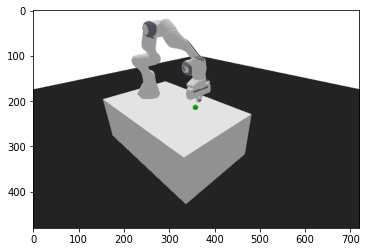

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(480, 720, 4)
(380, 382, 3)
torch.Size([3, 140, 140])
torch.Size([3, 140, 140])
(3, 140, 140)


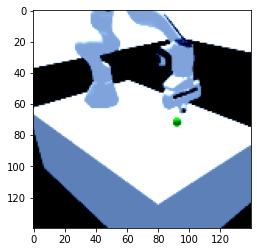

In [ ]:
env = gym.make("PandaReach-v2")
obs = env.reset()
print(obs)
done = False

# while not done:
for i in range(2):
    current_position = obs["observation"][0:3]
    desired_position = obs["desired_goal"][0:3]
    action = 5.0 * (desired_position - current_position)
    obs, reward, done, info = env.step(action)

    img = env.render(mode = 'rgb_array')
    # print(np.shape(img))
    plt.imshow(img)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

env.close()


print(np.shape(img))

new_img = np.delete(img,3,2) 
# delete 4th column of the 3rd dimension, data should be rgb

# print(np.shape(new_img))
# plt.imshow(new_img)

new_img2 = np.delete(new_img, slice(0,119),1) 
new_img3 = np.delete(new_img2, slice(380,599),1) 
new_img4 = np.delete(new_img3, slice(0,20),0) 
new_img5 = np.delete(new_img4, slice(380,479),0) 
print(np.shape(new_img5))



# print(np.shape(new_img3))
plt.imshow(new_img5)

# torch nn expects (n_samples, channels, height, width)
PIL_image = Image.fromarray(np.uint8(new_img5)).convert('RGB')

# torch_img = torch.tensor(new_img3)
# torch_img = torch_img.permute(2, 0, 1)
# print(np.shape(torch_img))

preprocess = transforms.Compose([
    transforms.Resize(180),
    transforms.CenterCrop(140),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(PIL_image)
print(np.shape(input_tensor))
plt.imshow(input_tensor.permute(1, 2, 0))
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
print(np.shape(input_tensor))
img = input_tensor.detach().numpy()
print(np.shape(img))

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

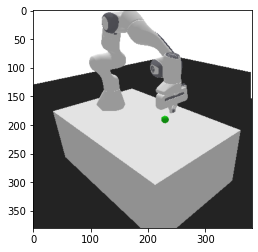

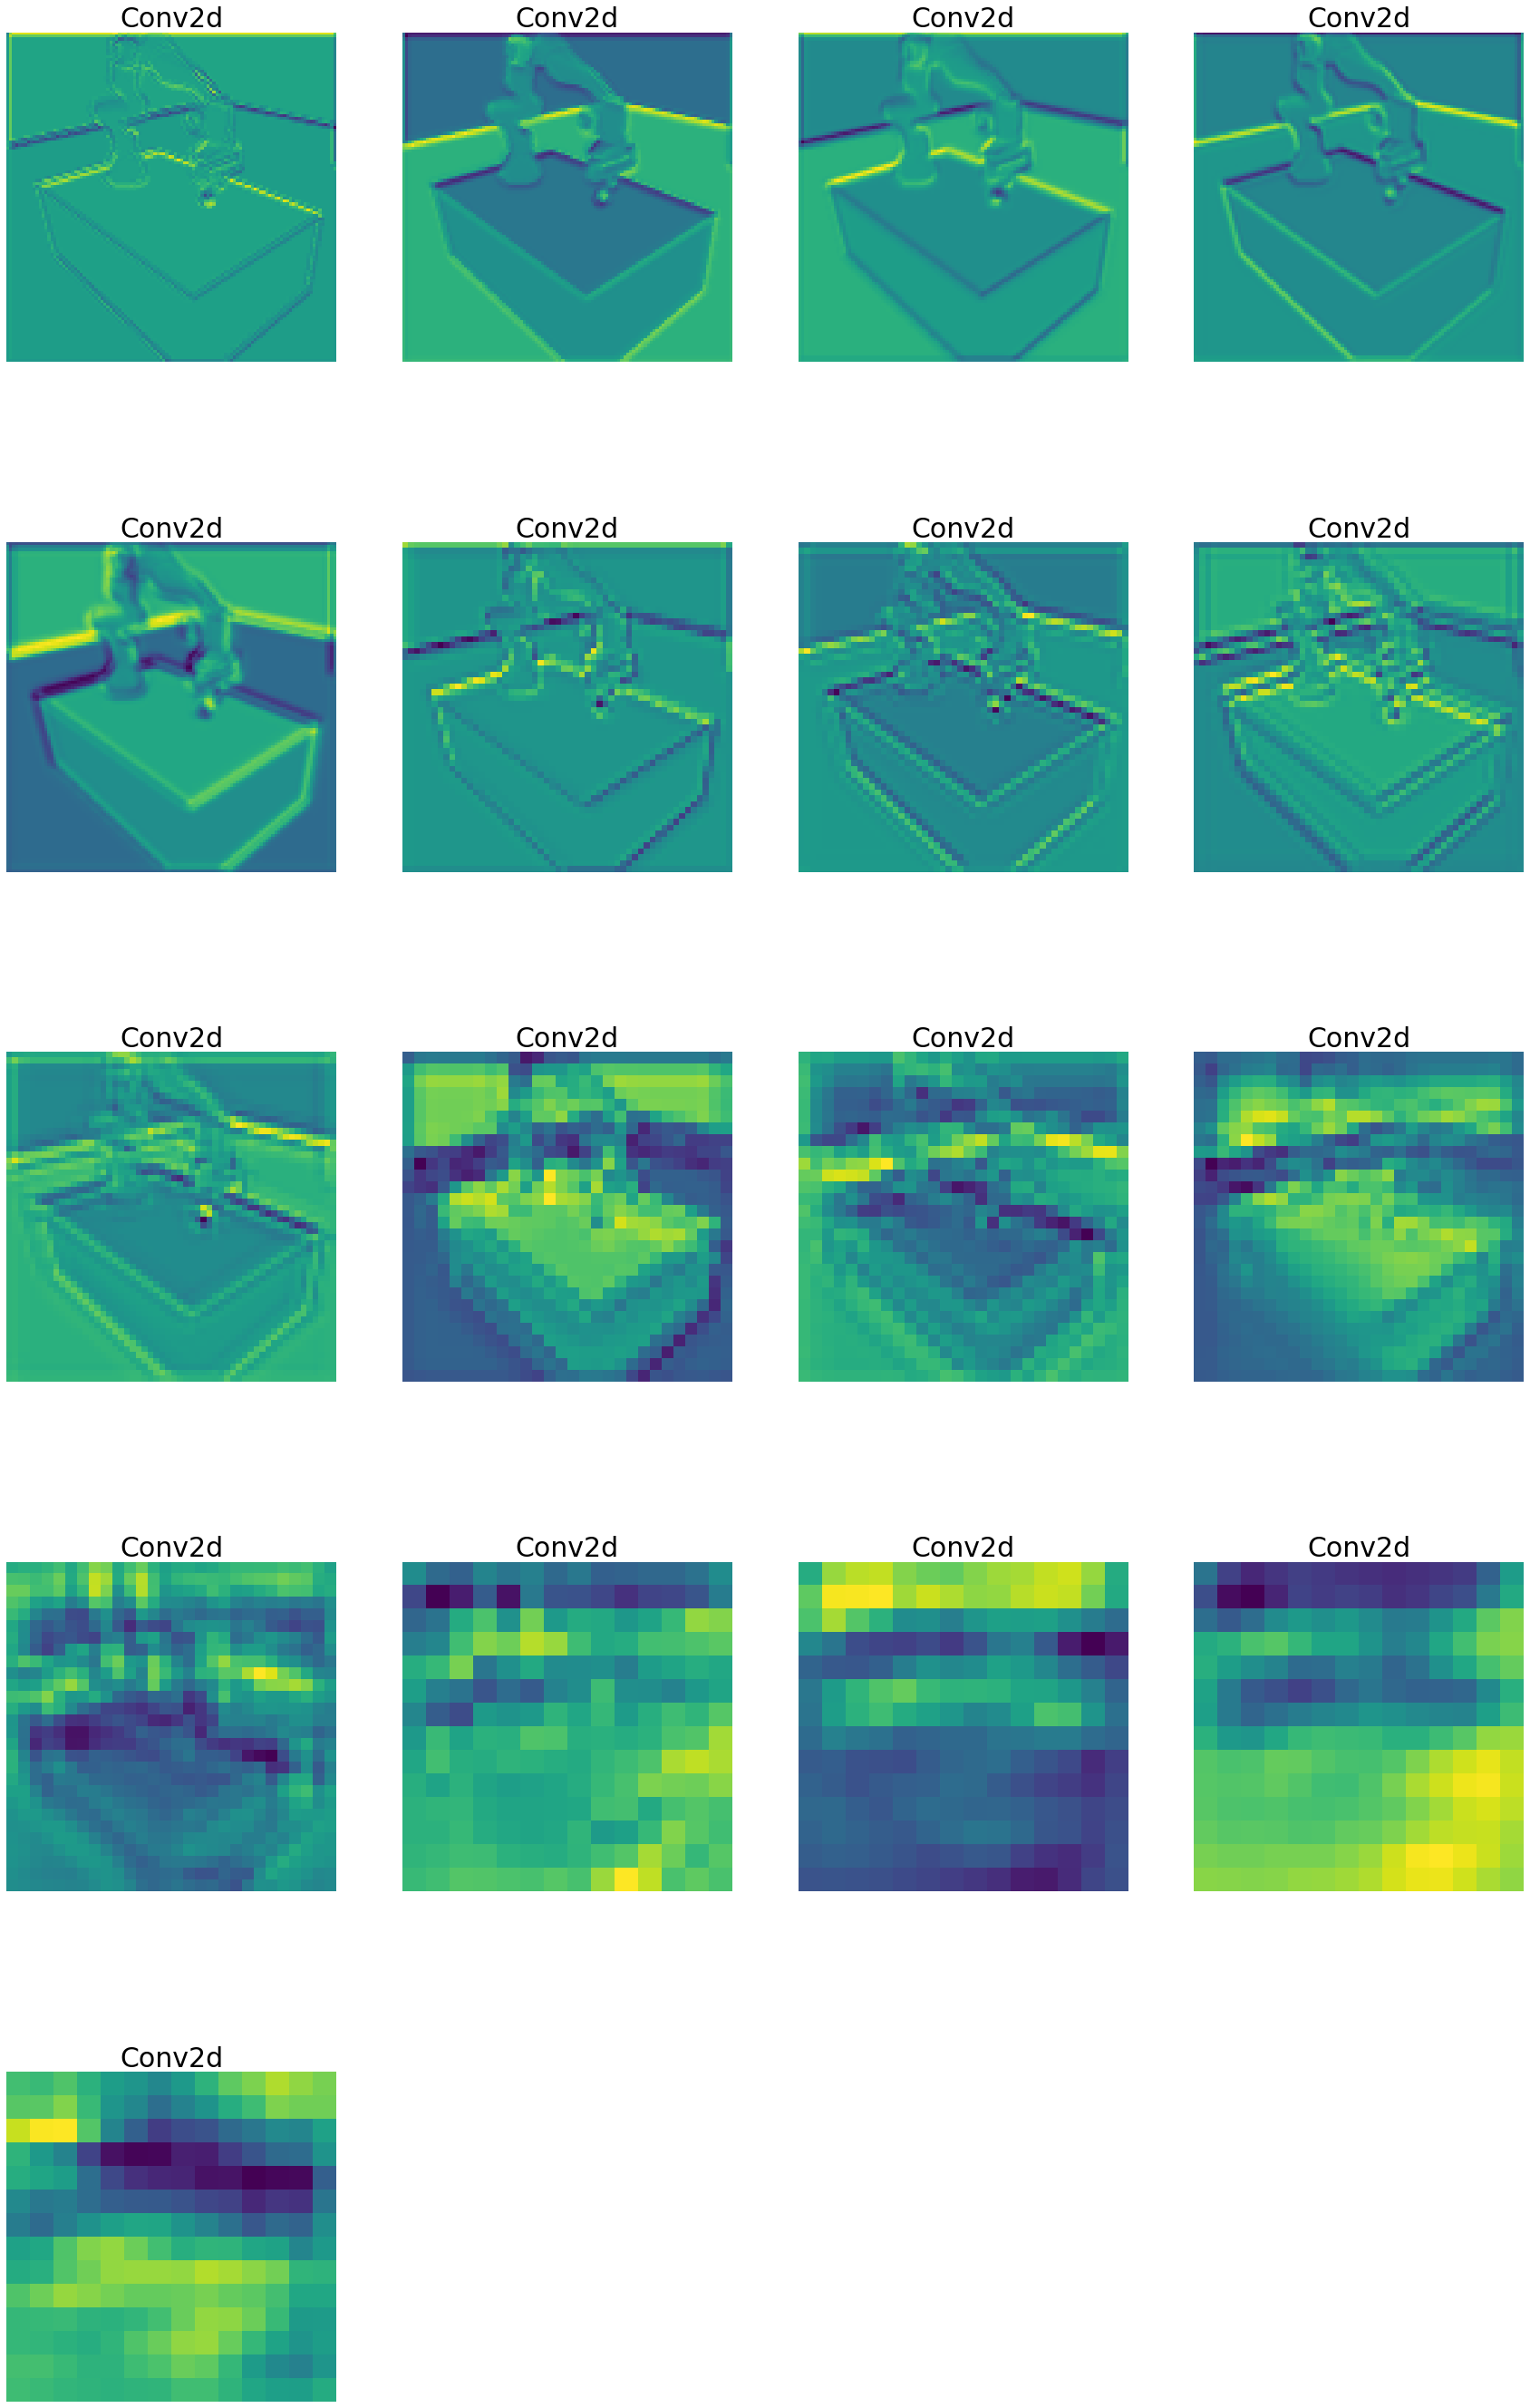

In [ ]:

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=0., std=1.)
])

image = PIL_image# Image.open(str('data/ori.jpg'))
plt.imshow(image)

model = models.resnet18(pretrained=True)
print(model)

# we will save the conv layer weights in this list
model_weights = []
# we will save the 49 conv layers in this list
conv_layers = []
# get all the model children as list
model_children = list(model.children())
# counter to keep count of the conv layers
counter = 0


# append all the conv layers and their respective wights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolution layers: {counter}")
print("conv_layers")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

image = transform(image)
print(f"Image shape before: {image.shape}")
image = image.unsqueeze(0)
print(f"Image shape after: {image.shape}")
image = image.to(device)

outputs = []
names = []
for layer in conv_layers[0:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
print(len(outputs))
# print feature_maps
for feature_map in outputs:
    print(feature_map.shape)

processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map, 0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)

fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
    a = fig.add_subplot(5, 4, i + 1)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)
plt.savefig(str('feature_maps.jpg'), bbox_inches='tight')